In [ ]:
# Imports generales
import pandas as pd
import io
import seaborn as sns
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import cluster
import sklearn.metrics
import time

# Graficos

## Grafico 1 (Árboles por distrito y estado de salud en el censo de 1995)

In [ ]:
new_tree_census_1995 = pd.read_csv('new_tree_census_1995.csv', sep=',')

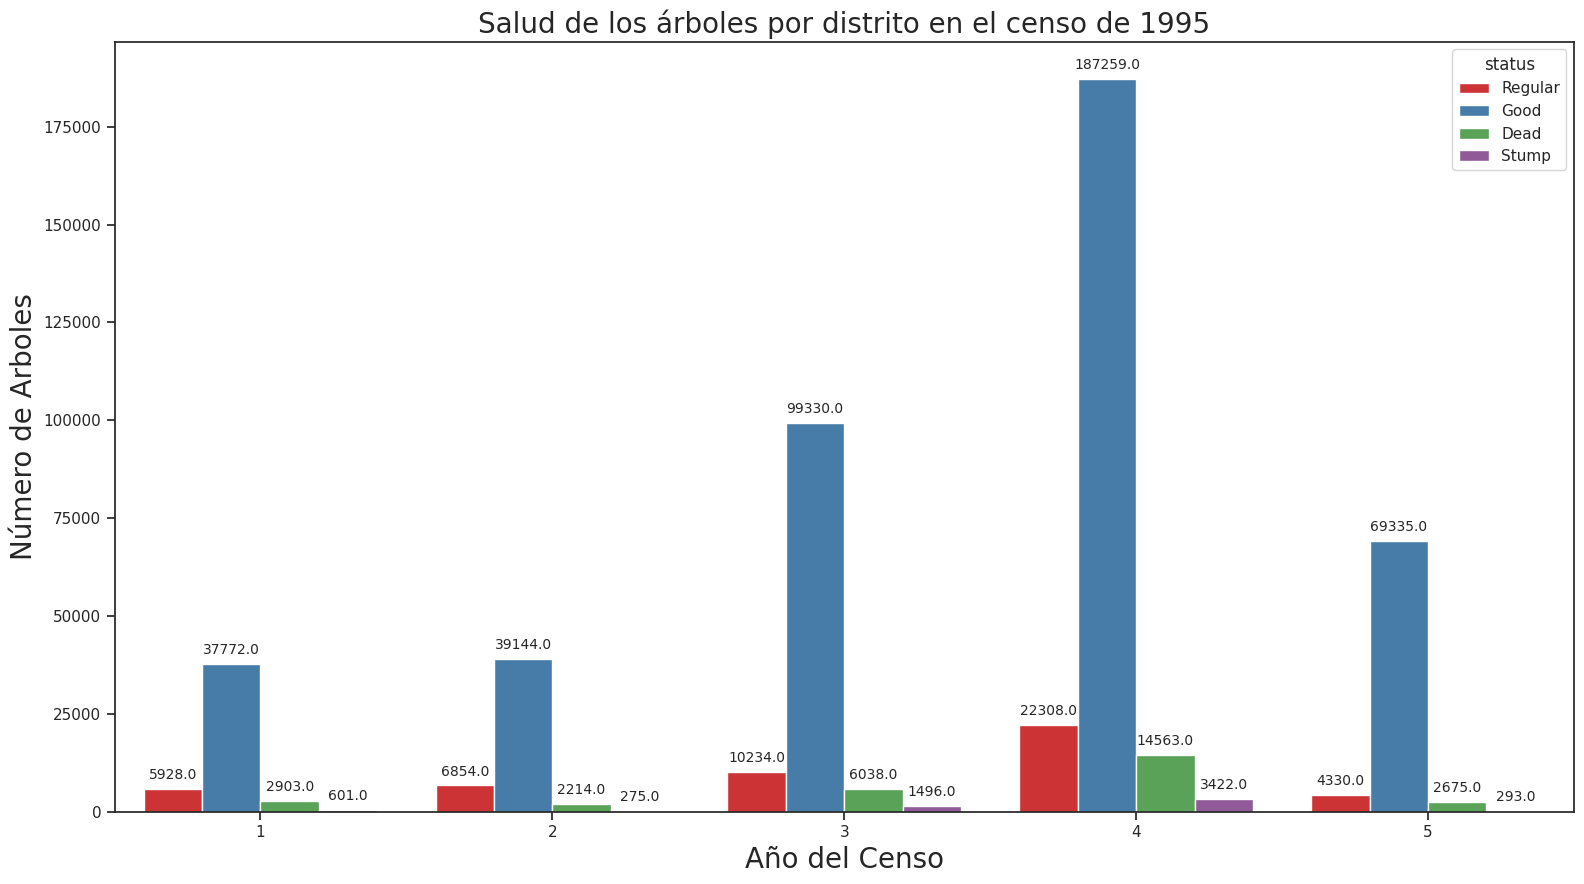

In [ ]:


# Supongamos que ya tienes el DataFrame new_tree_census_1995

# Configuración de estilo de seaborn
sns.set(style="ticks")

# Crear una figura y ejes para el gráfico combinado
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

# Gráfico de barras para la variable 'borough'
sns.countplot(x='borough', data=new_tree_census_1995, hue='status', ax=axes, palette='Set1')

# Mostrar los valores en las barras
for p in axes.patches:
    axes.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=10 )

axes.set_title('Salud de los árboles por distrito en el censo de 1995', fontsize=20)
plt.xlabel('Año del Censo', fontsize=20)
plt.ylabel('Número de Arboles', fontsize=20)
# Ajustes adicionales
plt.tight_layout()
plt.show()



In [ ]:
conteo_arboles_1995 = new_tree_census_1995.groupby(['borough','status']).size().reset_index(name='total_arboles')
conteo_arboles_1995.insert(0, 'Census_year', 1995)
print(conteo_arboles_1995.head(20))

    Census_year        borough   status  total_arboles
0          1995          Bronx     Dead           2214
1          1995          Bronx     Good          39144
2          1995          Bronx  Regular           6854
3          1995          Bronx    Stump            275
4          1995       Brooklyn     Dead           6038
5          1995       Brooklyn     Good          99330
6          1995       Brooklyn  Regular          10234
7          1995       Brooklyn    Stump           1496
8          1995      Manhattan     Dead           2903
9          1995      Manhattan     Good          37772
10         1995      Manhattan  Regular           5928
11         1995      Manhattan    Stump            601
12         1995         Queens     Dead          14563
13         1995         Queens     Good         187259
14         1995         Queens  Regular          22308
15         1995         Queens    Stump           3422
16         1995  Staten Island     Dead           2675
17        

In [ ]:
conteo_arboles_1995[conteo_arboles_1995['borough']=='Bronx']['total_arboles'].sum()

48487

## Grafico 2 (Número de Especies por Año y Distrito)

In [ ]:
especies_por_distrito_y_año = pd.read_csv('/content/especies_por_distrito_y_año (1).csv', sep=',')

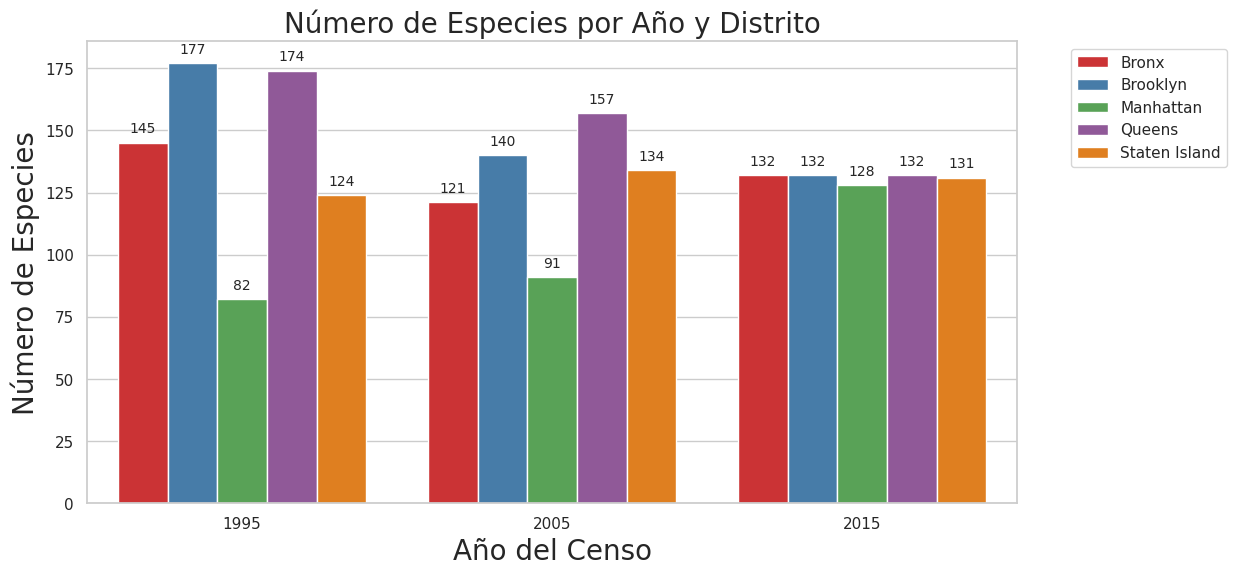

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes para el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Census_year', y='spc_latin', hue='borough', data=especies_por_distrito_y_año, palette='Set1')

# Añadir título y etiquetas
plt.title('Número de Especies por Año y Distrito', fontsize=20)
plt.xlabel('Año del Censo', fontsize=20)
plt.ylabel('Número de Especies', fontsize=20)

# Ajustar el formato de los números
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Agregar etiquetas a las barras verticales
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=10)

# Mover el cuadro de las etiquetas fuera del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


## Grafico 3 (Prediciones de arboles 2025 para las 10 especies )

In [ ]:
year_specie_arboles3_08MBID_predic = pd.read_csv('/content/year_specie_arboles3_08MBID_predic.csv', sep=',')

In [ ]:
year_specie_arboles3_08MBID_predic.tail()

,Census_year,spc_latin,total_arboles
35,2025,GLEDITSIA TRIACANTHOS,89288
36,2025,PLATANUS ACERIFOLIA,86528
37,2025,PYRUS CALLERYANA,87181
38,2025,QUERCUS PALUSTRIS,64154
39,2025,TILIA CORDATA,31519


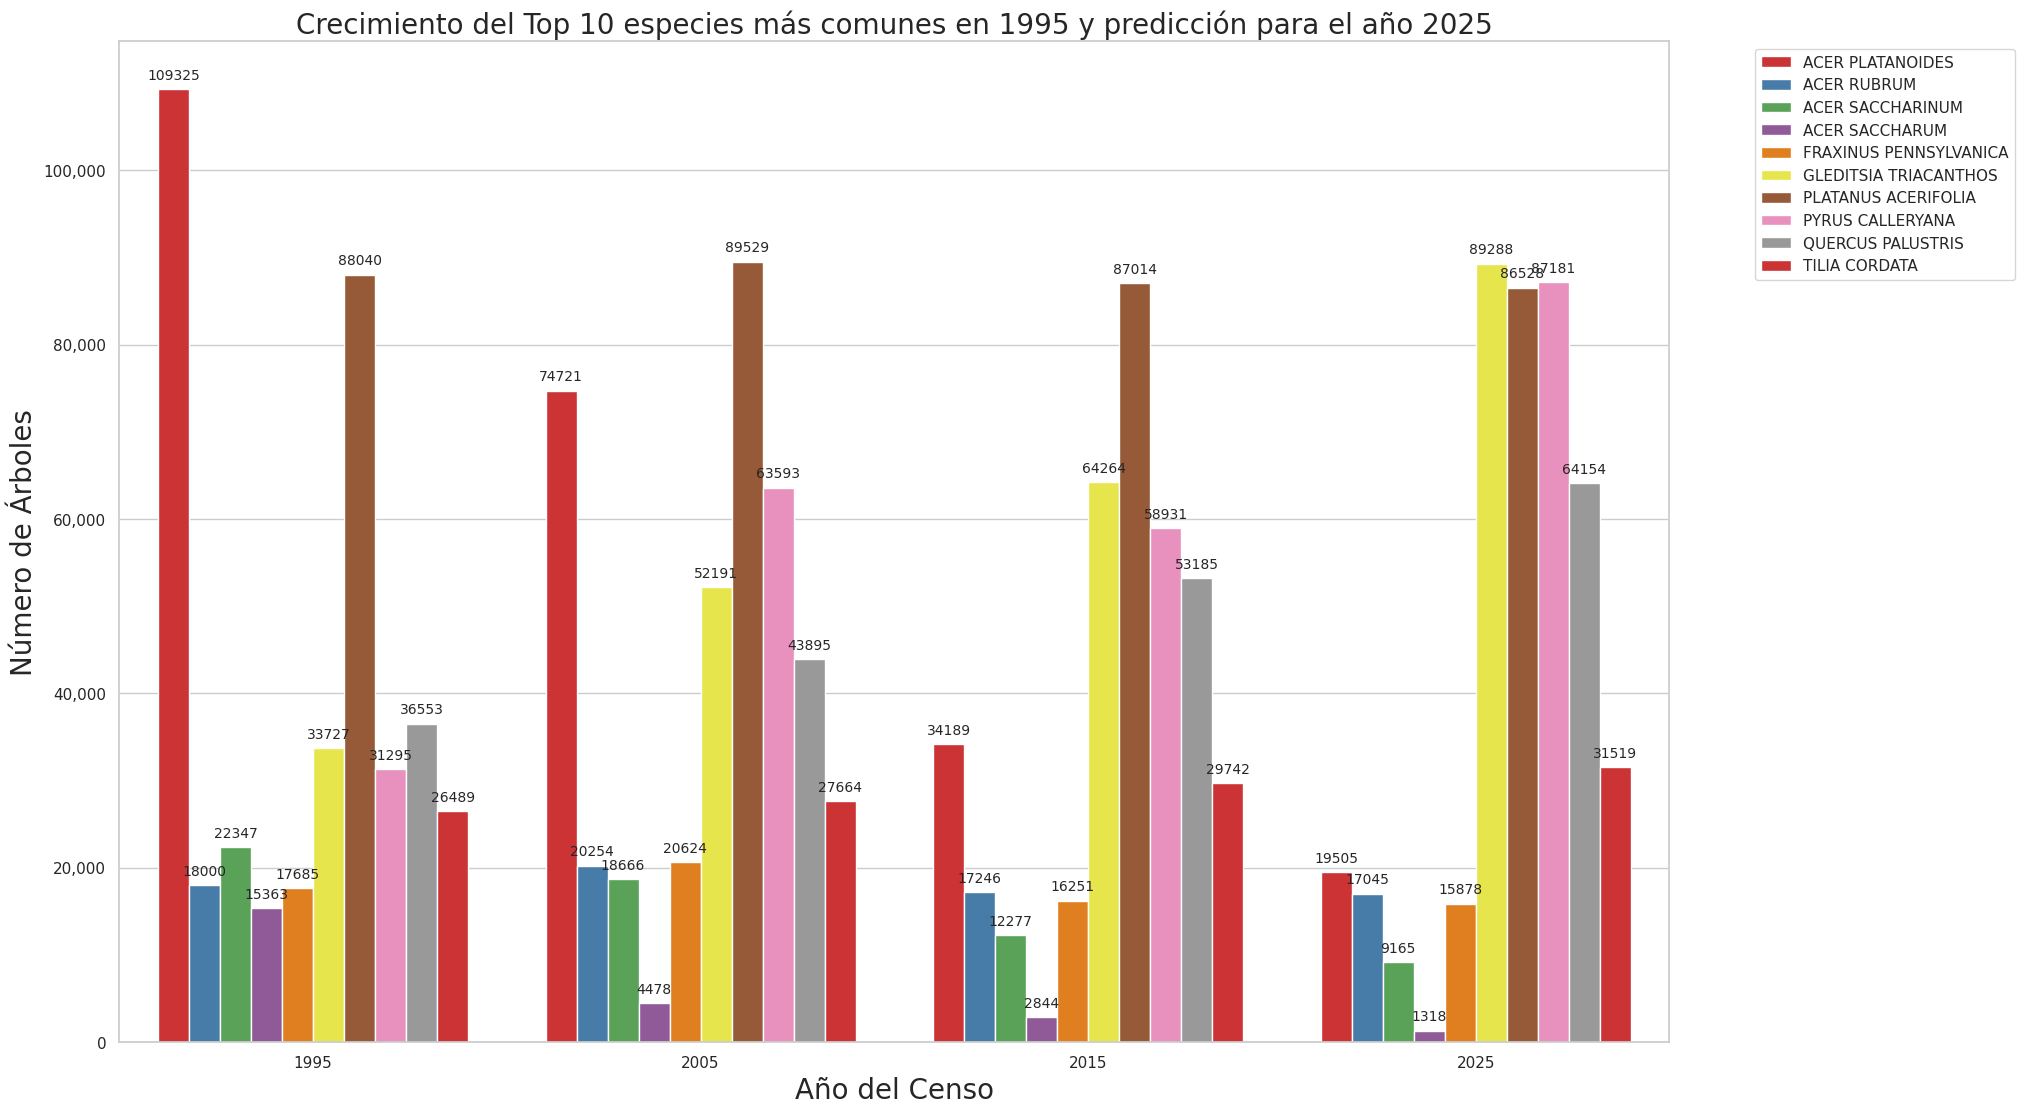

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes para el gráfico de barras
plt.figure(figsize=(20, 13))
ax = sns.barplot(x='Census_year', hue='spc_latin', y='total_arboles', data=year_specie_arboles3_08MBID_predic, dodge=True, palette='Set1')

# Añadir título y etiquetas
plt.title('Crecimiento del Top 10 especies más comunes en 1995 y predicción para el año 2025', fontsize=20)
plt.xlabel('Año del Censo', fontsize=20)
plt.ylabel('Número de Árboles', fontsize=20)

# Ajustar el formato de los números
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# Agregar etiquetas a las barras verticales
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=10)

# Mover el cuadro de las etiquetas fuera del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

## Grafico 4 (Prediciones de arboles 2025 para las 5 especies )

In [ ]:
especies_selec= ['ACER PLATANOIDES', 'PLATANUS ACERIFOLIA', 'QUERCUS PALUSTRIS',
       'GLEDITSIA TRIACANTHOS', 'PYRUS CALLERYANA', 'TILIA CORDATA',
       'ACER SACCHARINUM', 'ACER RUBRUM', 'FRAXINUS PENNSYLVANICA',
       'ACER SACCHARUM']

In [ ]:
especies_selec= ['ACER PLATANOIDES', 'PLATANUS ACERIFOLIA', 'QUERCUS PALUSTRIS',
       'GLEDITSIA TRIACANTHOS', 'PYRUS CALLERYANA']

In [ ]:
# Filtra los datos de los otros censos para las especies seleccionadas
year_specie_arboles3_08MBID_predic = year_specie_arboles3_08MBID_predic[year_specie_arboles3_08MBID_predic['spc_latin'].isin(especies_selec)]

In [ ]:
year_specie_arboles3_08MBID_predic.tail()

,Census_year,spc_latin,total_arboles
30,2025,ACER PLATANOIDES,19505
35,2025,GLEDITSIA TRIACANTHOS,89288
36,2025,PLATANUS ACERIFOLIA,86528
37,2025,PYRUS CALLERYANA,87181
38,2025,QUERCUS PALUSTRIS,64154


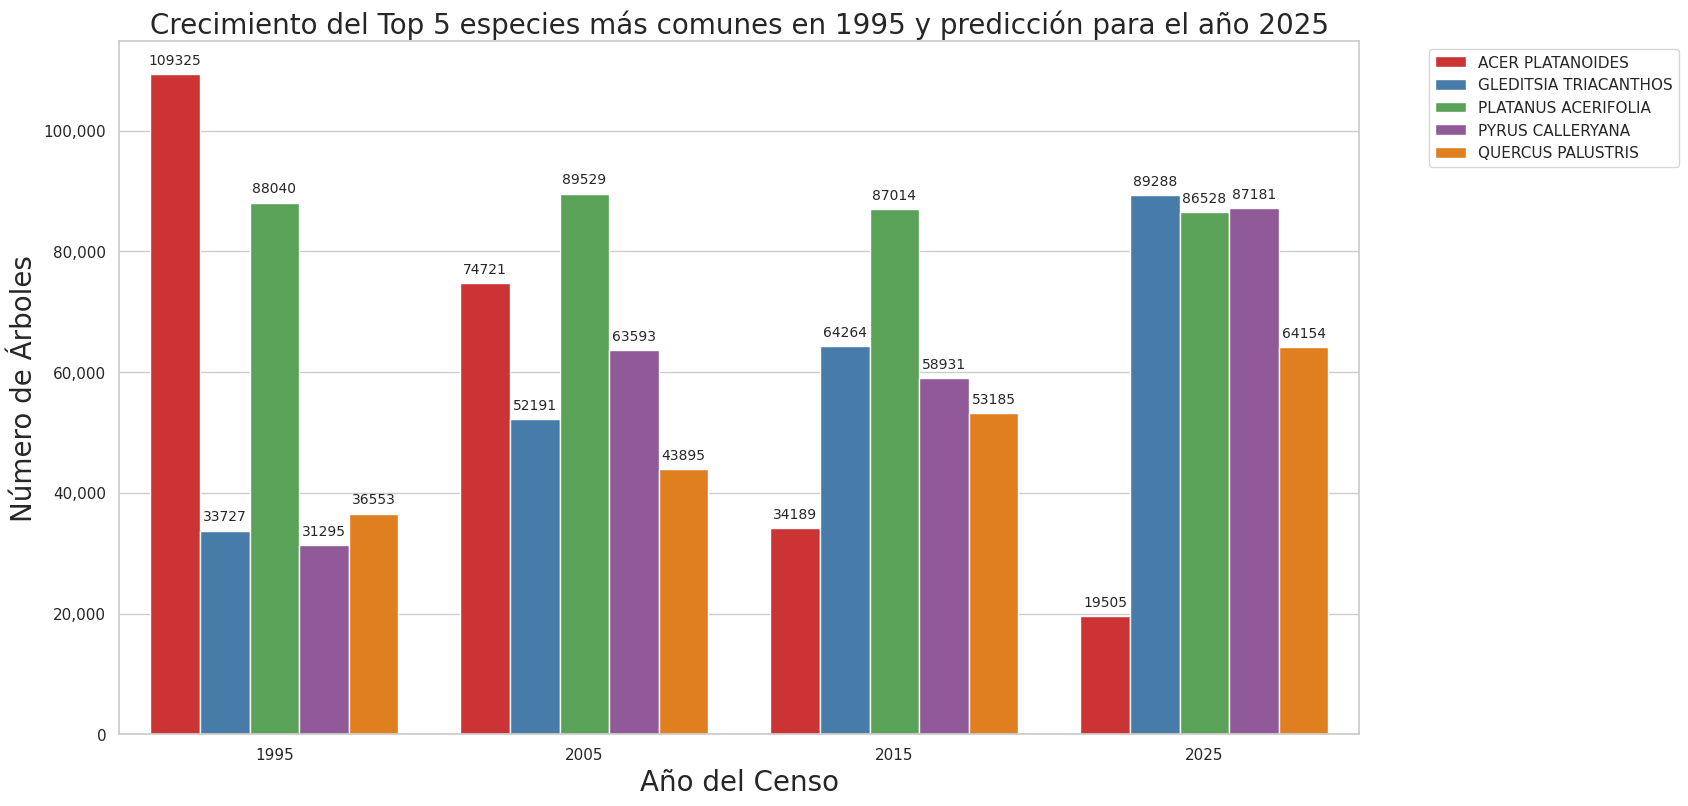

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes para el gráfico de barras
plt.figure(figsize=(16, 9))
ax = sns.barplot(x='Census_year', hue='spc_latin', y='total_arboles', data=year_specie_arboles3_08MBID_predic, dodge=True, palette='Set1')

# Añadir título y etiquetas
plt.title('Crecimiento del Top 5 especies más comunes en 1995 y predicción para el año 2025', fontsize=20)
plt.xlabel('Año del Censo', fontsize=20)
plt.ylabel('Número de Árboles', fontsize=20)

# Ajustar el formato de los números
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# Agregar etiquetas a las barras verticales
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=10)

# Mover el cuadro de las etiquetas fuera del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

## Grafico 5 (10 especies con más árboles por año de censo)

In [ ]:
top_10_especies_year = pd.read_csv('/content/top_10_especies_year.csv', sep=',')

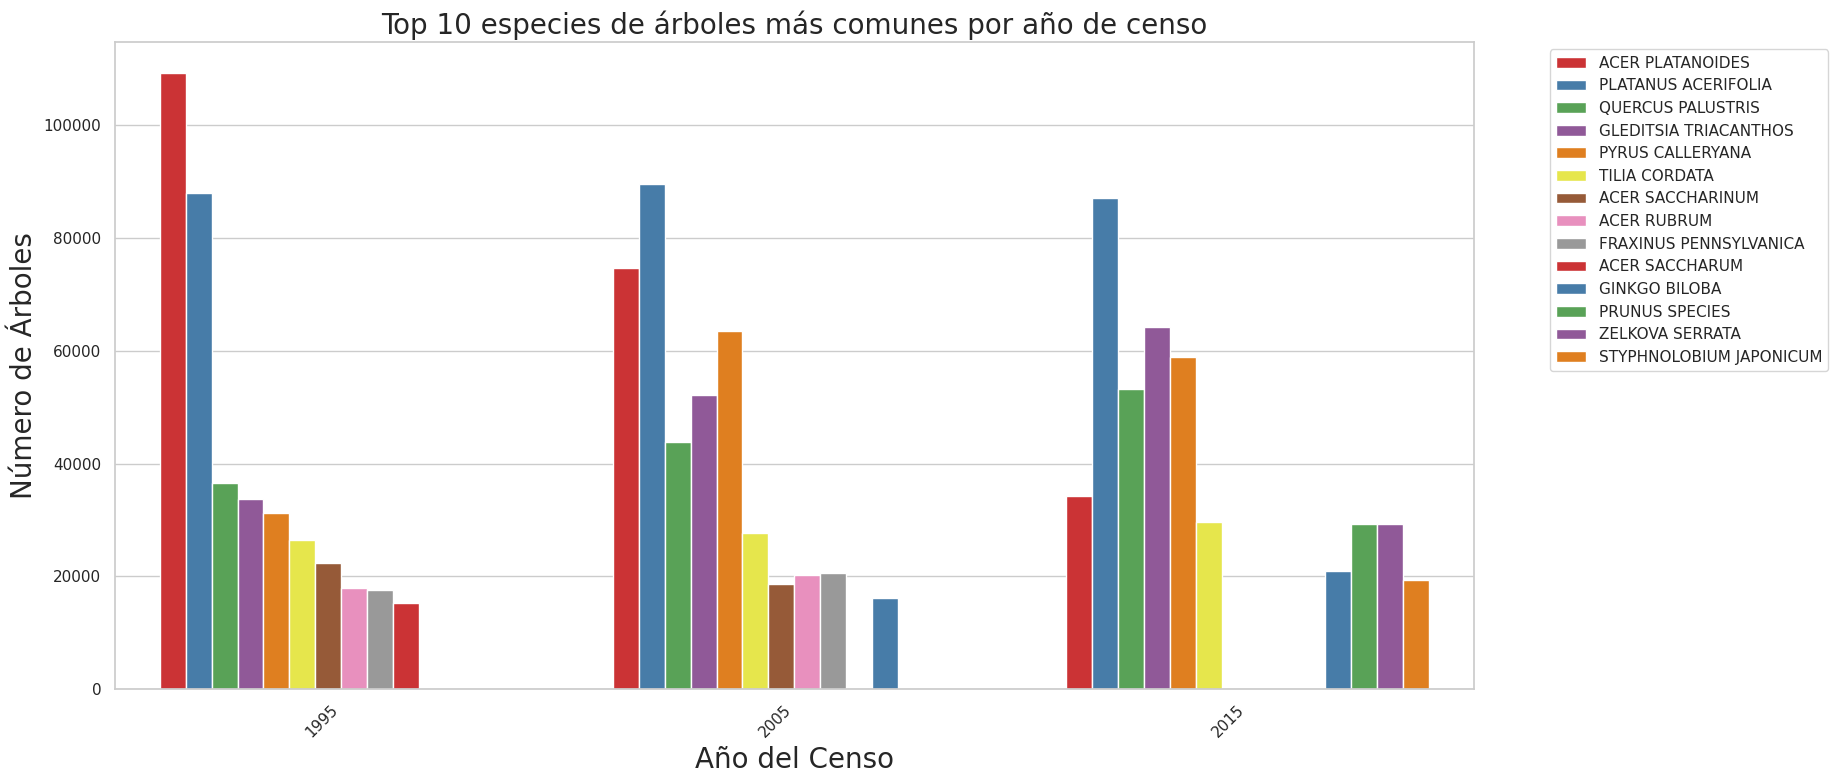

In [ ]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes para el gráfico combinado
plt.figure(figsize=(15, 8))

# Gráfico de barras para el número total de árboles por especie y año
sns.barplot(hue='spc_latin', y='total_arboles', x='Census_year', data=top_10_especies_year, palette='Set1')

# Ajustes adicionales
plt.title('Top 10 especies de árboles más comunes por año de censo', fontsize=20)
plt.xlabel('Año del Censo', fontsize=20)
plt.ylabel('Número de Árboles', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Mover el cuadro de las etiquetas fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Tabla de tasa de crecimiento

In [2]:
tabla_comparativa_top_10 = pd.read_csv('/content/tabla_comparativa_top_10 (1).csv', sep=',')

In [3]:
tabla_comparativa_top_10

,spc_latin,count_1995,count_2015,growth_trees_count,pct_crecimiento
0,ACER PLATANOIDES,109325.0,34189,-75136.0,-69.0
1,ACER RUBRUM,18000.0,17246,-754.0,-4.0
2,ACER SACCHARINUM,22347.0,12277,-10070.0,-45.0
3,ACER SACCHARUM,15363.0,2844,-12519.0,-81.0
4,FRAXINUS PENNSYLVANICA,17685.0,16251,-1434.0,-8.0
5,GINKGO BILOBA,13758.0,21024,7266.0,53.0
6,GLEDITSIA TRIACANTHOS,33727.0,64264,30537.0,91.0
7,PLATANUS ACERIFOLIA,88040.0,87014,-1026.0,-1.0
8,PRUNUS SPECIES,735.0,29279,28544.0,3884.0
9,PYRUS CALLERYANA,31295.0,58931,27636.0,88.0
